In [7]:
import json
import os
import numpy as np
import pandas as pd


result_dir = '../results_tqfm_circle_kfold'

json_files = sorted([f for f in os.listdir(result_dir) if f.endswith('.json')])

results = []
for file in json_files:
    with open(os.path.join(result_dir, file), 'r') as f:
        data = json.load(f)
        results.append(data)
        

        
# Create DataFrame
df = pd.DataFrame(results)
df = df.sort_values('depth').reset_index(drop=True)

# Only take depth with min mean_loss
min_val_loss_indices = df.groupby('depth')['mean_loss'].idxmin()
df = df.loc[min_val_loss_indices].reset_index(drop=True)
print(df)



   run_id  depth  mean_loss  mean_val_before  mean_test_before  \
0       1      1   0.471481         0.584375            0.5375   
1       3      2   0.477732         0.571875            0.5725   
2       5      3   0.431142         0.578125            0.5225   
3       4      4   0.445937         0.575000            0.4700   
4       3      5   0.431732         0.540625            0.5050   
5       3      6   0.438408         0.559375            0.4800   
6       1      7   0.423209         0.559375            0.5475   
7       2      8   0.422767         0.559375            0.4975   

   mean_val_after  mean_test_after  
0        0.578125           0.5275  
1        0.553125           0.5125  
2        0.603125           0.5100  
3        0.550000           0.4750  
4        0.568750           0.5300  
5        0.565625           0.5125  
6        0.590625           0.5275  
7        0.590625           0.5025  


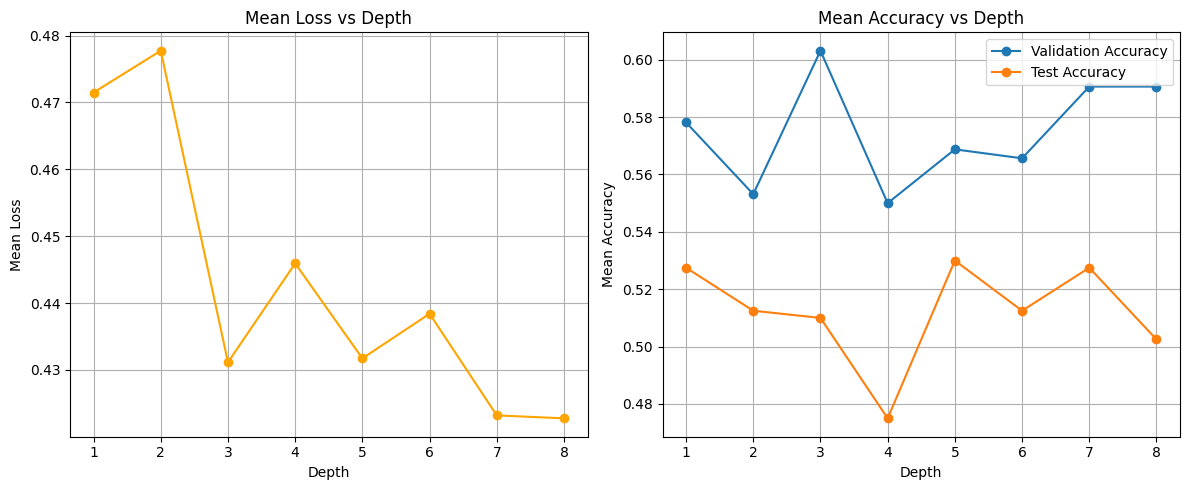

In [16]:
# Plotting
import matplotlib.pyplot as plt
depths = df['depth']
acc_val = df['mean_val_after']
acc_test = df['mean_test_after']
loss = df['mean_loss']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Loss plot
axes[0].plot(depths, loss, marker='o', color='orange')	
axes[0].set_title('Mean Loss vs Depth')
axes[0].set_xlabel('Depth')
axes[0].set_ylabel('Mean Loss')
axes[0].grid(True)
# Accuracy plot
axes[1].plot(depths, acc_val, marker='o')
axes[1].plot(depths, acc_test, marker='o')
axes[1].set_title('Mean Accuracy vs Depth')
axes[1].set_xlabel('Depth')
axes[1].set_ylabel('Mean Accuracy')
axes[1].grid(True)
axes[1].legend(['Validation Accuracy', 'Test Accuracy'])

plt.tight_layout()
plt.show()

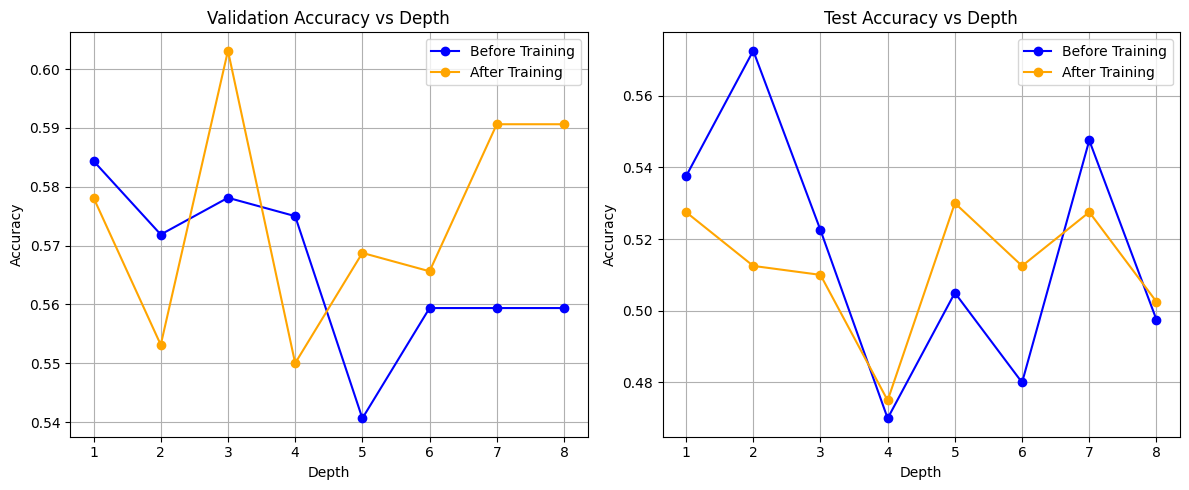

In [17]:
import matplotlib.pyplot as plt
depths = df['depth']

acc_val_after = df['mean_val_after']
acc_test_after = df['mean_test_after']

acc_val_before = df['mean_val_before']
acc_test_before = df['mean_test_before']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Accuracy plot
axes[0].plot(depths, acc_val_before, marker='o', color='blue')
axes[0].plot(depths, acc_val_after, marker='o', color='orange')
axes[0].set_title('Validation Accuracy vs Depth')
axes[0].set_xlabel('Depth')
axes[0].set_ylabel('Accuracy')
axes[0].grid(True)
axes[0].legend(['Before Training', 'After Training'])
# Accuracy plot
axes[1].plot(depths, acc_test_before, marker='o', color='blue')
axes[1].plot(depths, acc_test_after, marker='o', color='orange')
axes[1].set_title('Test Accuracy vs Depth')
axes[1].set_xlabel('Depth')
axes[1].set_ylabel('Accuracy')
axes[1].grid(True)
axes[1].legend(['Before Training', 'After Training'])
plt.tight_layout()
plt.show()